In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import random
import pydot
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO  
from sklearn import tree
import graphviz

In [2]:
data = pd.read_csv("hw_2_stops.csv").dropna()


In [3]:
for elem in ['day','month','location.housing','suspect.sex','suspect.build','suspect.race','suspected.crime']:
    

    unique_list = list(set(data[elem]))
    days_dict = dict(zip(unique_list,range(len(unique_list))))
    data[elem] = map(lambda x:days_dict[x],data[elem])


In [4]:
X = data.drop(['found.weapon','arrested','date'],1)
y = data['arrested']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [6]:
clf1 = DecisionTreeClassifier(random_state=0,min_samples_split=20,max_features=6,max_depth=5)
fitted_model1 = clf1.fit(X_train,y_train)

95.6654096052
95.6021487713
95.615080544
95.6339539419
95.6930206873
95.8495999888
95.7300684685
95.8342216646
95.8296780688
95.9537531849


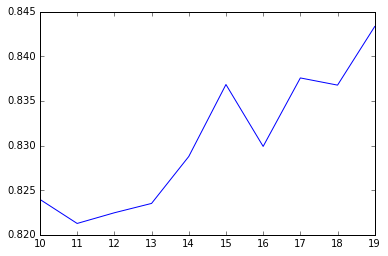

In [7]:
scores = []
for i in range(10,20):
    
    clf = DecisionTreeClassifier(random_state=0,min_samples_split=i,max_features=6)
    fitted_model = clf.fit(X_train,y_train)
    result = clf.predict(X_test)
    print sum(result==y_test)*100.0/len(y_test)
    scores.append(roc_auc_score(result, y_test))

plt.plot(range(10,20),scores)

In [ ]:
plt.plot(range(10,20),scores)

In [14]:
from IPython.display import Image  
dotfile = StringIO()  
tree.export_graphviz(fitted_model1,feature_names=X_train.columns, rounded=True,special_characters=True)  


The first step was to randomly split the data into training and testing data (The conventional rule is 60,20,20 for train, validation, test) but validation is not used here so the split is 75:25. The test variable is arrested, but dates, is removed, as it didn't seem that important. Also the optional subsetting was not performed as the variable is arrested and subsetting did not seem like the best option as there are many predicates anyway. The min_sample was used to control the tree and not leaf nodes.The AUC score increases as the samples in the each split are increased from 10-20, meaning that overfitting was happening before. 

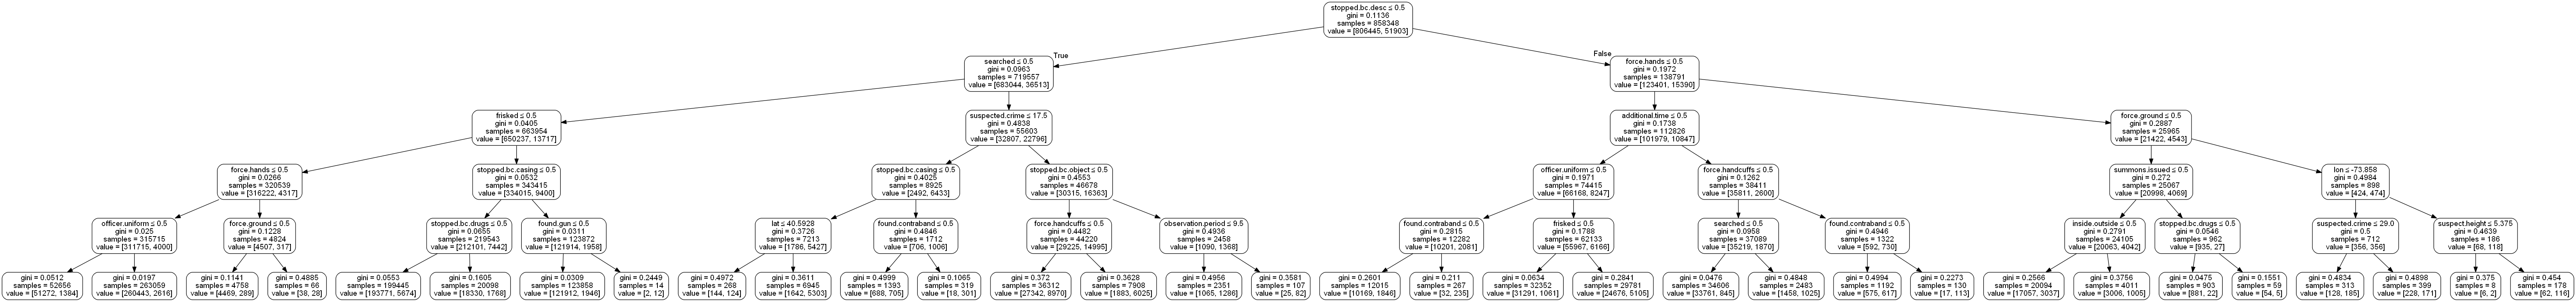

In [16]:
Image(filename="dt_plot.png")